# Functional Neuroimaging Analysis in Python using the "Functional Connectivity of Music-Induced Analgesia in Fibromyalgia" dataset


## Preprocessing fMRI data

We used the standard procedure of fMRIprep to preprocess the data according to the current standards.

## Exploring fMRIPrep preprocessing pipeline outputs using pyBIDS

In [1]:
import bids

In [2]:
layout = bids.BIDSLayout('/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output', config=['bids','derivatives'])

In [3]:
layout.get_subjects()

['01']

In [4]:
layout.get_tasks()

['rest2', 'rest1', 'rest3', 'rest4']

In [5]:
# all structural data
preproc_T1 = layout.get(datatype='anat', desc='preproc', extension=".nii.gz")
preproc_T1

[<BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_desc-preproc_T1w.nii.gz'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'>]

In [6]:
# MNI152NLin2009cAsym structural data
mni_preproc_T1 = layout.get(datatype='anat',desc='preproc',extension='.nii.gz',space='MNI152NLin2009cAsym')
mni_preproc_T1

[<BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'>]

In [7]:
# Native/T1w space structural data
native_preproc_T1 = [f for f in preproc_T1 if f not in mni_preproc_T1]
native_preproc_T1

[<BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_desc-preproc_T1w.nii.gz'>]

In [8]:
# all functional data
func_data = layout.get(datatype='func', desc='preproc')
func_data

[<BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'>,
 <BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest2_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'>,
 <BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest3_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/s

In [9]:
# MNI152NLin2009cAsym Functional Data
mni_func_data = layout.get(datatype='func', desc='preproc', space='MNI152NLin2009cAsym')
mni_func_data

[<BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'>,
 <BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest2_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'>,
 <BIDSJSONFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest3_space-MNI152NLin2009cAsym_desc-preproc_bold.json'>,
 <BIDSImageFile filename='/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/s

In [10]:
# Native/T1w space functional data
t1w_func_data = layout.get(datatype='func', desc='preproc', space='T1w')
t1w_func_data 

[]

## Introduction to Nilearn and Image manipulation

In [11]:
# modules to use nilearn
import os.path
from nilearn import image as nimg
from nilearn import plotting as nplot
from bids import BIDSLayout

#for inline visualization in jupyter notebook
%matplotlib inline 

In [12]:
# Base directory for fmriprep output
fmriprep_dir = '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output'
layout = BIDSLayout(fmriprep_dir, config=['bids','derivatives'])

T1w_files = layout.get(subject='01', datatype='anat',
                       desc='preproc', extension='.nii.gz',
                       return_type='file')

brainmask_files = layout.get(subject='01', datatype='anat', suffix="mask",
                             desc='brain', extension='.nii.gz',
                             return_type='file')

In [13]:
# Display preprocessed files inside of anatomy folder

T1w_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_desc-preproc_T1w.nii.gz',
 '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/anat/sub-01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz']

In [14]:
t1 = T1w_files[0]
bm = brainmask_files[0]

t1_img = nimg.load_img(t1)
bm_img = nimg.load_img(bm)

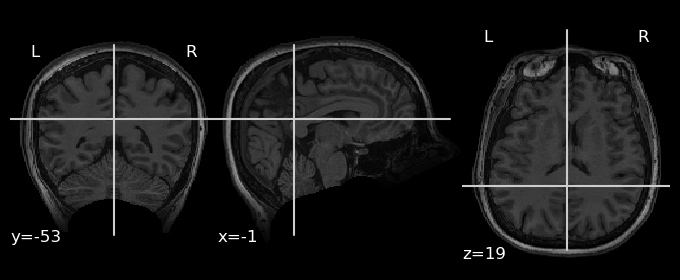

In [15]:
nplot.plot_anat(t1_img)


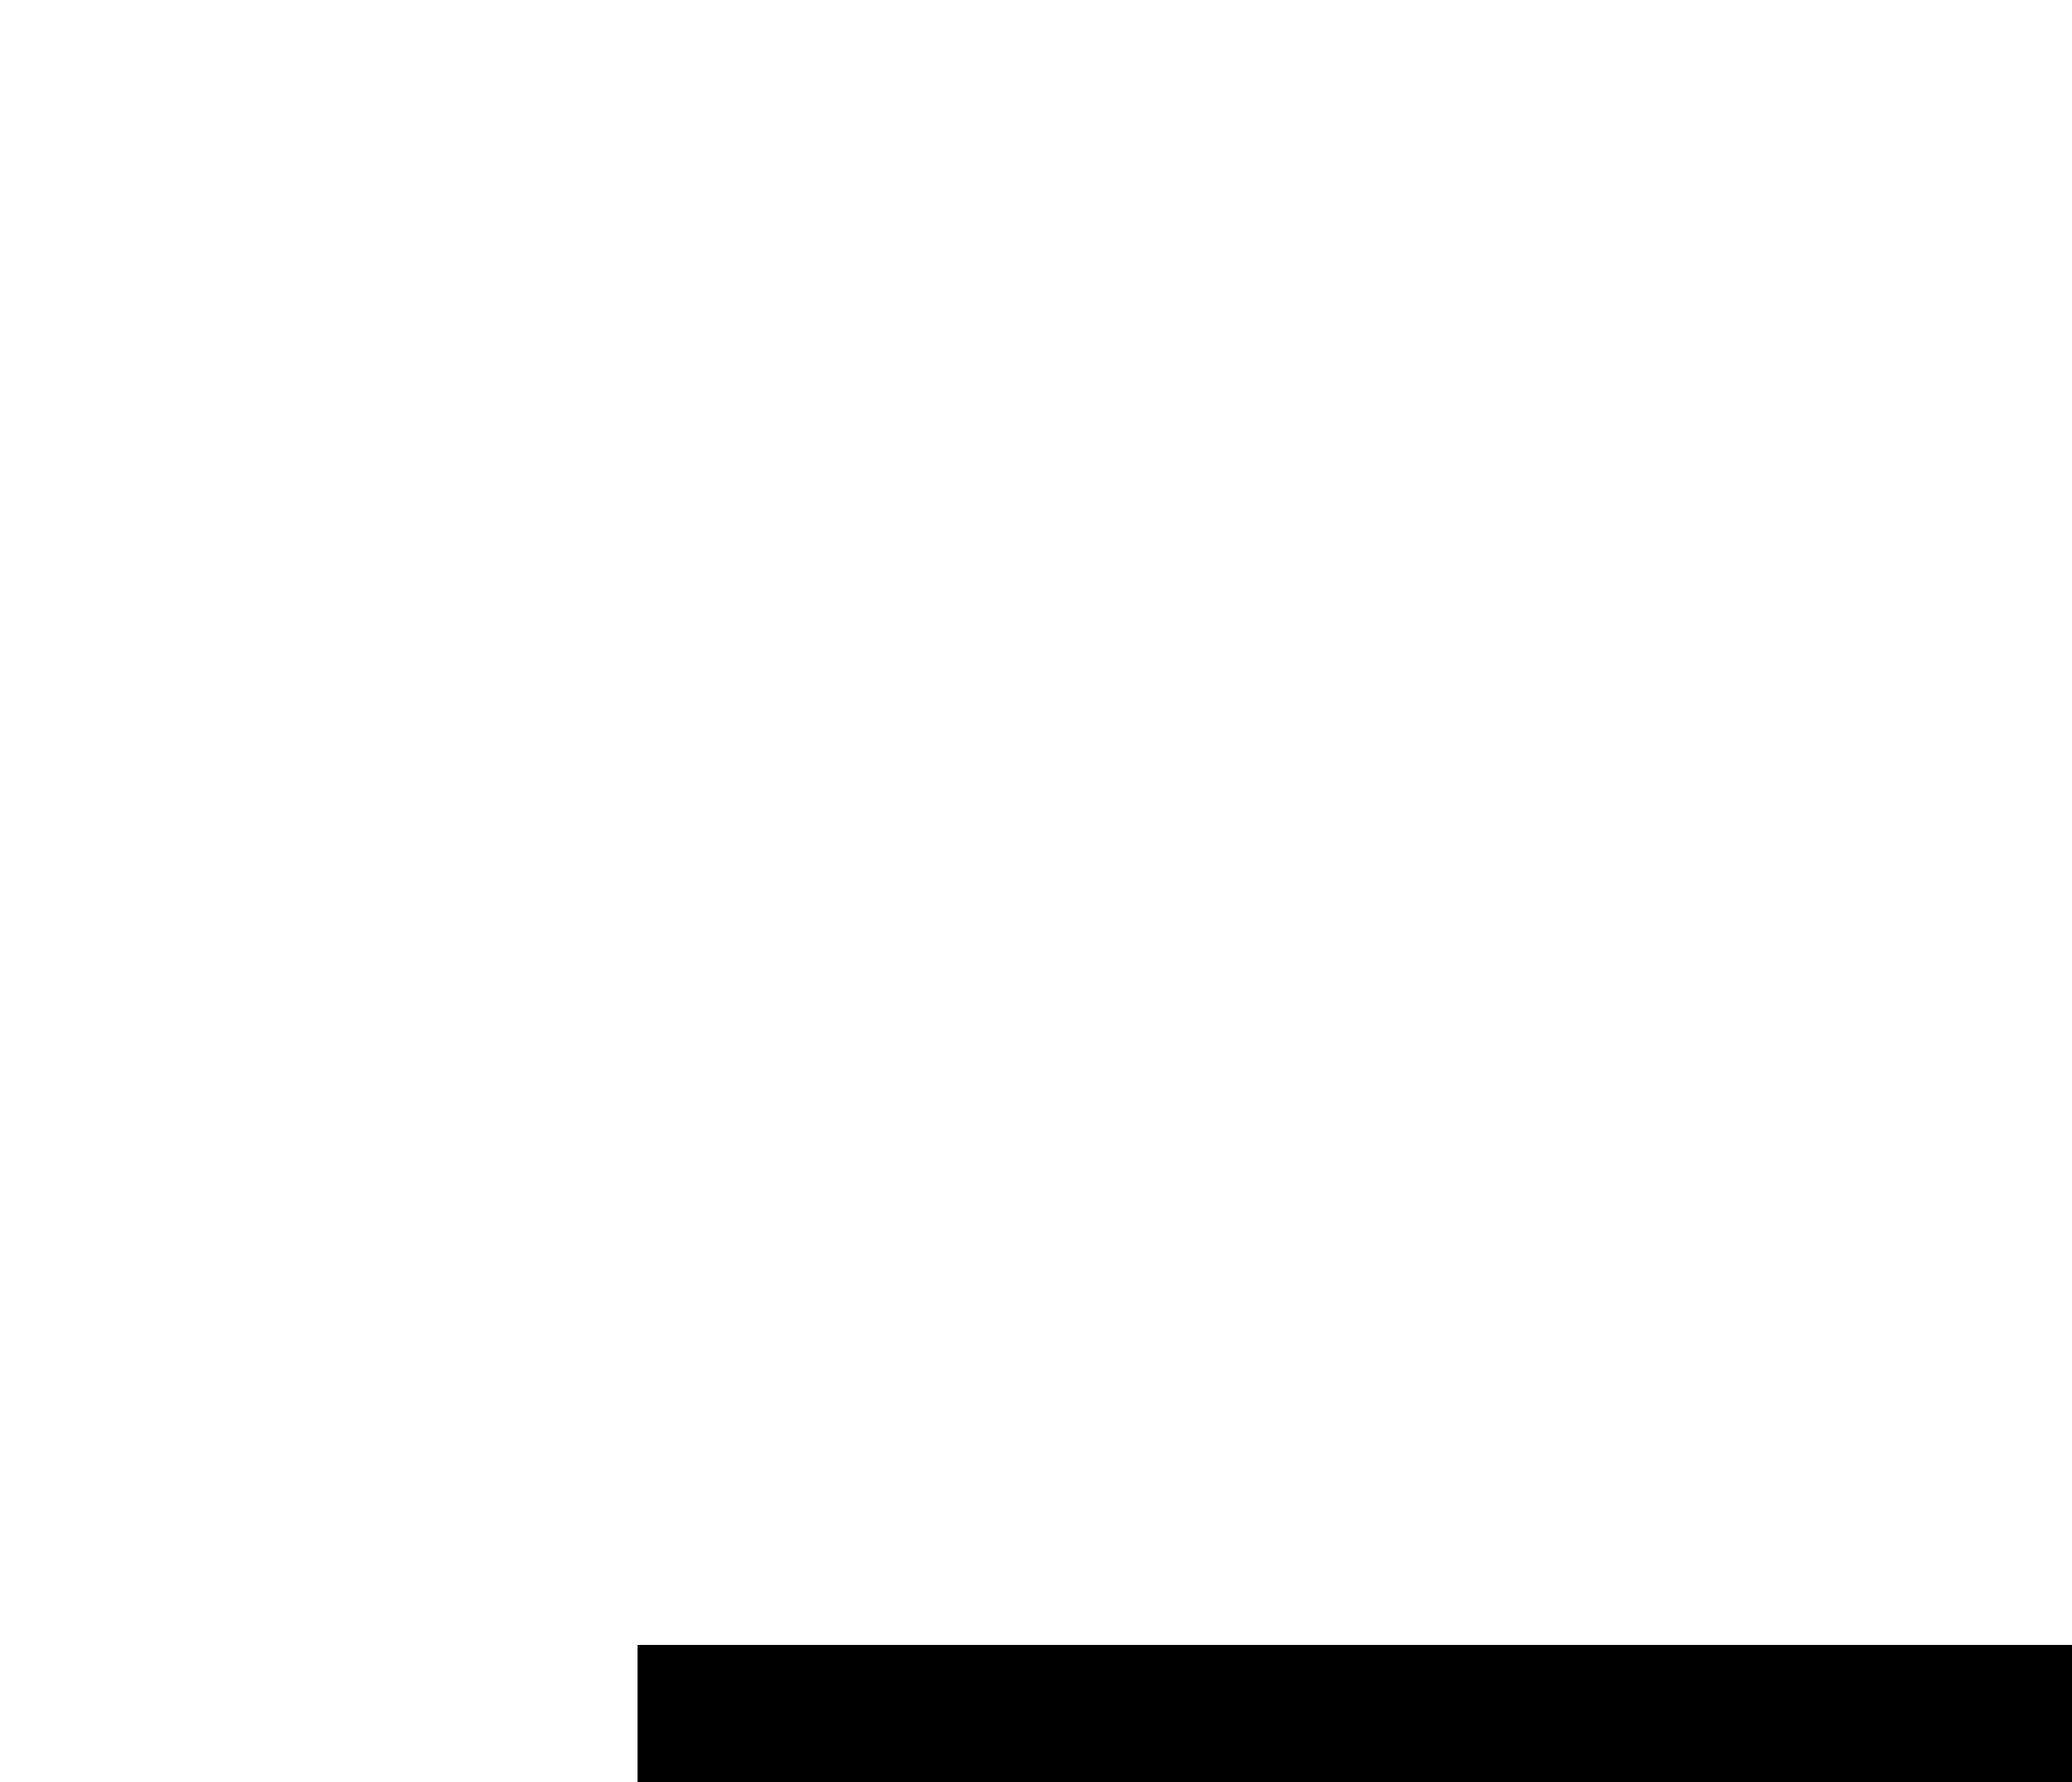
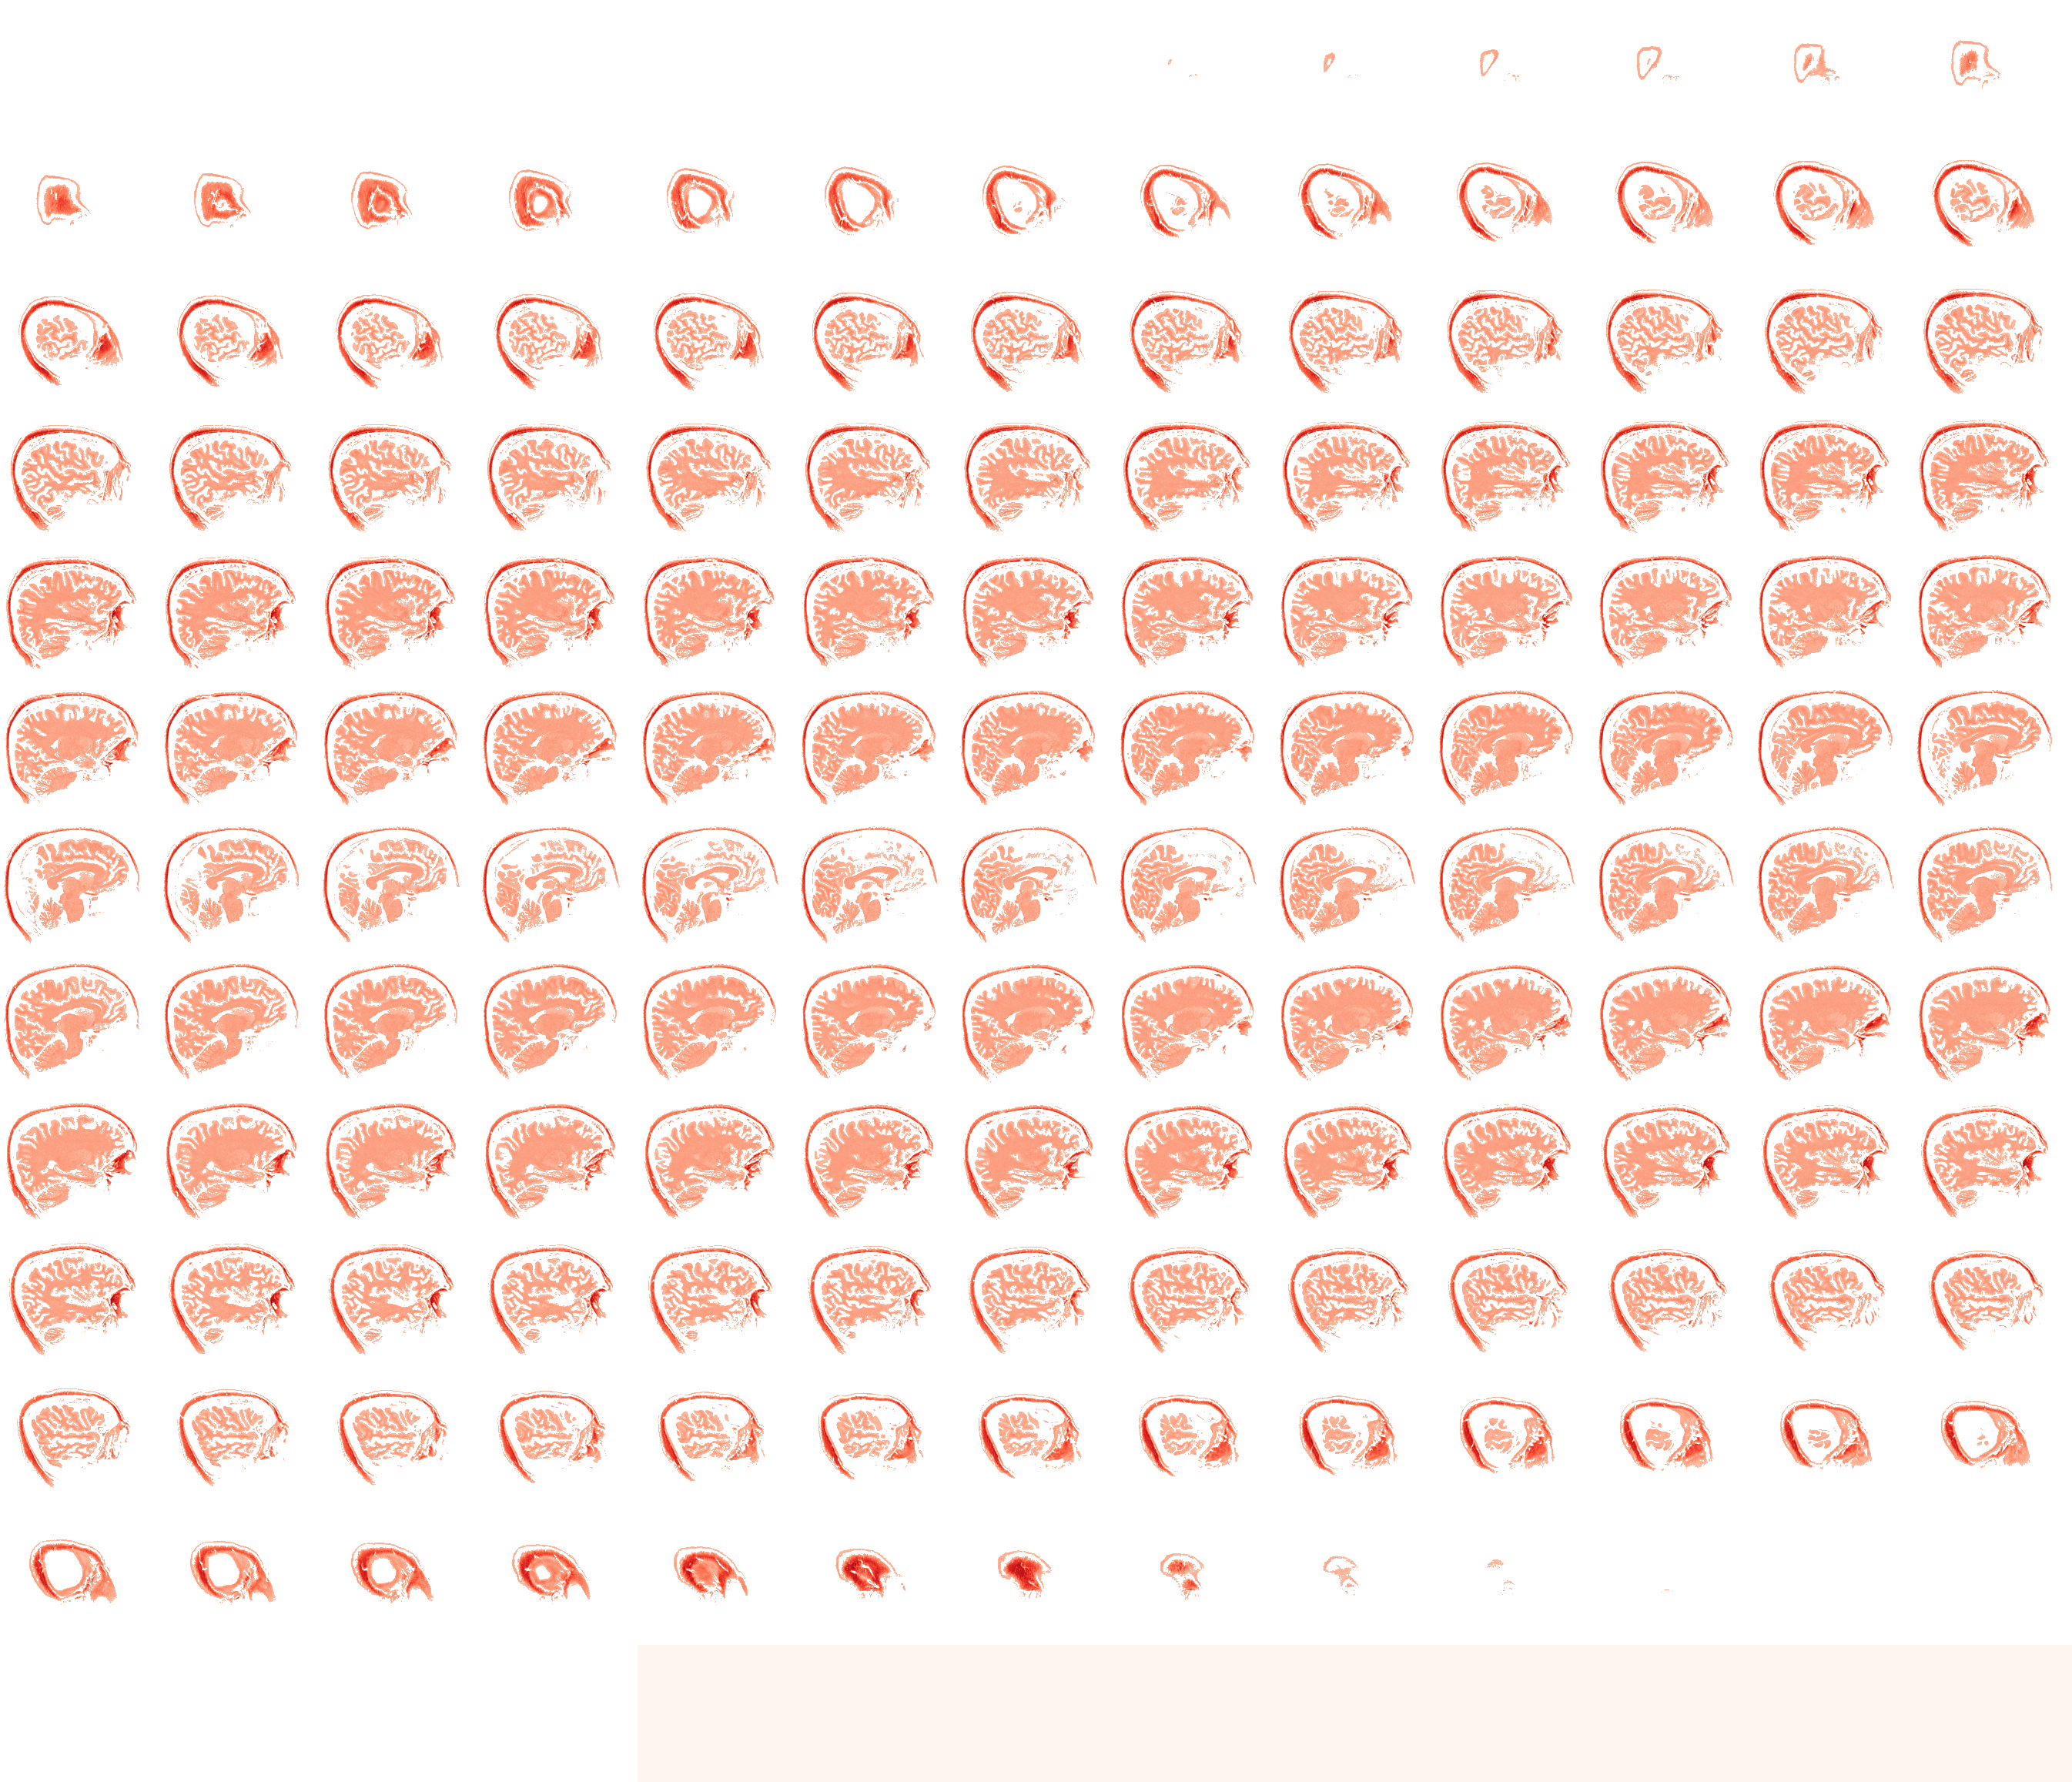

In [16]:
nplot.view_img(t1_img,
               bg_img=False, # Disable using a standard image as the background
               cmap='Reds', # Set color scale so white matter appears lighter than grey
               symmetric_cmap=False, # We don't have negative values
               threshold="auto", # Clears out the background
              )

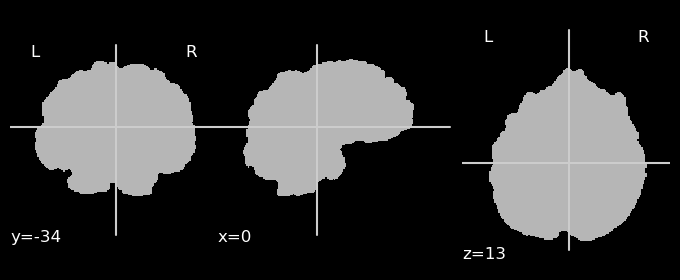

In [17]:
# viewing the mask
nplot.plot_anat(bm_img)

### Arithmetic operations

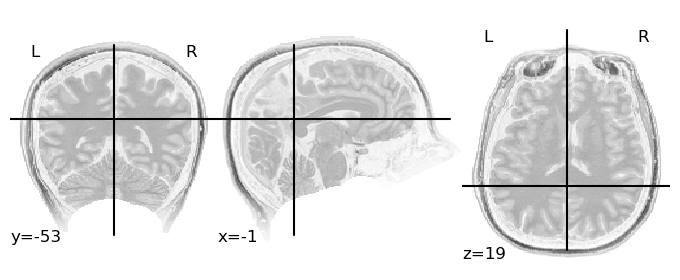

In [18]:
# inverting the most negative parts of the image appear black
invert_img = nimg.math_img('-a', a=t1)
nplot.plot_anat(invert_img)

### Applying a mask

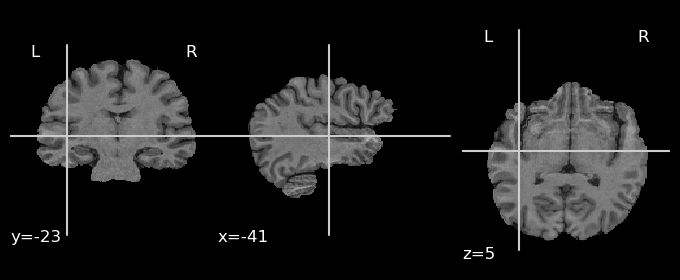

In [19]:
#  multipling a raw image (our T1), with some mask image (our bm)
masked_t1 = nimg.math_img('a*b', a=t1, b=bm)
nplot.plot_anat(masked_t1)


### Slicing

In [20]:
x_slice = t1_img.slicer[20:21,:,:]

In [21]:
t1_data = t1_img.get_fdata()
x_slice = t1_data[10,:,:]

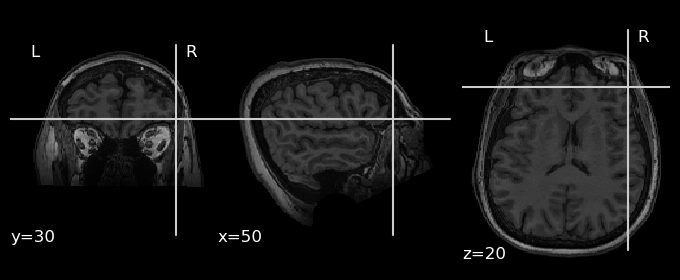

In [22]:
nplot.plot_anat(t1_img,cut_coords=(50,30,20))

## Integrating functional time-series data

In [23]:
fmriprep_dir = '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output'
layout=BIDSLayout(fmriprep_dir, validate=False,
                  config=['bids','derivatives'])

T1w_files = layout.get(subject='01',
                       datatype='anat', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                      return_type='file')

brainmask_files = layout.get(subject='01',
                             datatype='anat', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')

func_files = layout.get(subject='01',
                        datatype='func', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                       return_type='file')

func_mask_files = layout.get(subject='01',
                             datatype='func', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')


In [24]:
func_mni = func_files[0]
func_mni_img = nimg.load_img(func_mni)

### fMRI dimensions

In [25]:
# (x, y, z, t)
func_mni_img.shape

(97, 115, 65, 100)

### Time series data

In [26]:
#Pick one voxel at coordinate (30,50,20)
single_vox = func_mni_img.slicer[29:30,49:50,19:20,:].get_fdata()
single_vox.shape

(1, 1, 1, 100)

In [27]:
single_vox = single_vox.flatten()
single_vox.shape

(100,)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Signal Value')

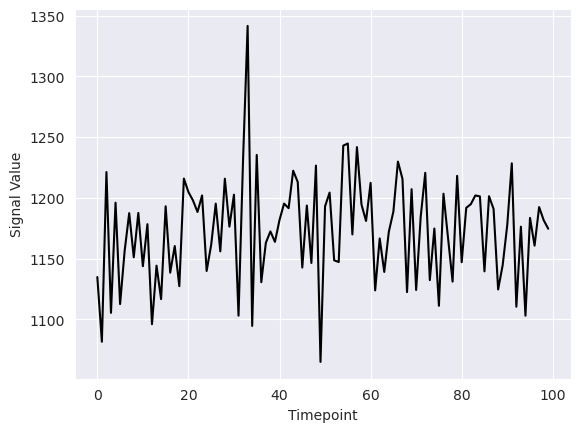

In [29]:
# Make an array counting from 0 --> 100, this will be our x-axis
x_axis = np.arange(0, single_vox.shape[0])

# Plot our x and y data, the 'k' just specifies the line color to be black
plt.plot( x_axis, single_vox, 'k')

# Label our axes
plt.xlabel('Timepoint')
plt.ylabel('Signal Value')

# a possible artifact around 37 timepoint

### Resampling

In [30]:
# Files we'll be using (MNI space, which means they are normalized brains)
T1_mni = T1w_files[0]
T1_mni_img = nimg.load_img(T1_mni)

In [31]:
print(T1_mni_img.shape)
print(func_mni_img.shape)

(176, 229, 193)
(97, 115, 65, 100)


(97, 115, 65)
(97, 115, 65, 100)


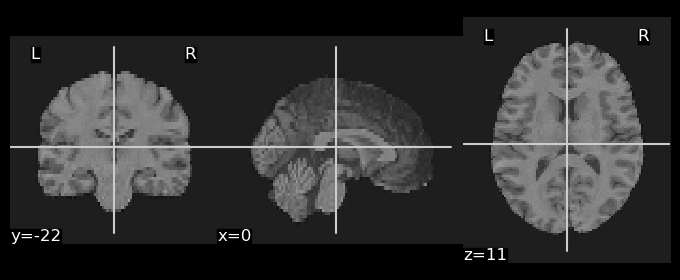

In [32]:
#playing around with methods of interpolation
#options: 'linear','continuous','nearest'
resamp_t1 = nimg.resample_to_img(source_img=T1_mni_img,target_img=func_mni_img,interpolation='continuous')
print(resamp_t1.shape)
print(func_mni_img.shape)
nplot.plot_anat(resamp_t1)


## Confound cleaning fMRI time-series signals

In [33]:
import pandas as pd

In [34]:
sub = '01'
fmriprep_dir = '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output'
layout = bids.BIDSLayout(fmriprep_dir,validate=False,
                        config=['bids','derivatives'])

In [35]:
func_files = layout.get(subject=sub,
                        datatype='func', task='rest1',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')

mask_files = layout.get(subject=sub,
                        datatype='func', task='rest1',
                        desc='brain',
                        suffix='mask',
                        space='MNI152NLin2009cAsym',
                        extension="nii.gz",
                       return_type='file')

confound_files = layout.get(subject=sub,
                            datatype='func', task='rest1',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

In [36]:
func_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [37]:
mask_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz']

In [38]:
confound_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_desc-confounds_timeseries.tsv']

In [39]:
func_file = func_files[0]
mask_file = mask_files[0]
confound_file = confound_files[0]

In [40]:
#Delimiter is \t --> tsv is a tab-separated spreadsheet
confound_df = pd.read_csv(confound_file, delimiter='\t')
confound_df.head()

global_signal  global_signal_derivative1  global_signal_power2  \
0    2479.008323                        NaN          6.145482e+06   
1    2478.969362                  -0.038961          6.145289e+06   
2    2481.060368                   2.091006          6.155661e+06   
3    2476.021601                  -5.038767          6.130683e+06   
4    2472.212983                  -3.808618          6.111837e+06   

   global_signal_derivative1_power2          csf  csf_derivative1  \
0                               NaN  2523.322671              NaN   
1                          0.001518  2490.683316       -32.639355   
2                          4.372306  2496.821771         6.138455   
3                         25.389172  2494.106134        -2.715638   
4                         14.505572  2489.580516        -4.525618   

   csf_derivative1_power2    csf_power2  white_matter  \
0                     NaN  6.367157e+06   2203.018347   
1             1065.327505  6.203503e+06   2200.503216   
2               37.680631  6.234119e+06   2201.857297   
3                7.374687  6.220565e+06   2196.874534   
4               20.481217  6.198011e+06   2198.250390   

   white_matter_derivative1  ...  motion_outlier02  motion_outlier03  \
0                       NaN  ...               0.0               0.0   
1                 -2.515131  ...               0.0               0.0   
2                  1.354081  ...               0.0               0.0   
3                 -4.982763  ...               0.0               0.0   
4                  1.375856  ...               0.0               0.0   

   motion_outlier04  motion_outlier05  motion_outlier06  motion_outlier07  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   motion_outlier08  motion_outlier09  motion_outlier10  motion_outlier11  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 157 columns]

### The Yeo 2011 Pre-processing schema

In [41]:
# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z',
                 'global_signal',
                 'csf', 'white_matter']

In [42]:
# Get derivative column names
derivative_columns = ['{}_derivative1'.format(c) for c
                     in confound_vars]

print(derivative_columns)

['trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [43]:
final_confounds = confound_vars + derivative_columns
print(final_confounds)

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf', 'white_matter', 'trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [44]:
confound_df = confound_df[final_confounds]
confound_df.head()

trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  global_signal  \
0  0.016936  0.118422 -0.132015  0.000900 -0.000669 -0.001465    2479.008323   
1  0.019185  0.076394 -0.038071 -0.000068 -0.000806 -0.002142    2478.969362   
2  0.023874  0.069709 -0.109719  0.000009 -0.000591 -0.001889    2481.060368   
3  0.019100  0.121139 -0.169041  0.000328 -0.000764 -0.001134    2476.021601   
4  0.016765  0.054052 -0.048939 -0.000574 -0.000718 -0.001604    2472.212983   

           csf  white_matter  trans_x_derivative1  trans_y_derivative1  \
0  2523.322671   2203.018347                  NaN                  NaN   
1  2490.683316   2200.503216             0.002249            -0.042028   
2  2496.821771   2201.857297             0.004689            -0.006685   
3  2494.106134   2196.874534            -0.004775             0.051430   
4  2489.580516   2198.250390            -0.002334            -0.067087   

   trans_z_derivative1  rot_x_derivative1  rot_y_derivative1  \
0                  NaN                NaN                NaN   
1             0.093944          -0.000968          -0.000137   
2            -0.071648           0.000077           0.000215   
3            -0.059322           0.000319          -0.000174   
4             0.120101          -0.000902           0.000046   

   rot_z_derivative1  global_signal_derivative1  csf_derivative1  \
0                NaN                        NaN              NaN   
1          -0.000677                  -0.038961       -32.639355   
2           0.000253                   2.091006         6.138455   
3           0.000755                  -5.038767        -2.715638   
4          -0.000470                  -3.808618        -4.525618   

   white_matter_derivative1  
0                       NaN  
1                 -2.515131  
2                  1.354081  
3                 -4.982763  
4                  1.375856

#### Dummy TR drop

In [45]:
#First we'll load in our data and check the shape
raw_func_img = nimg.load_img(func_file)
raw_func_img.shape

(97, 115, 65, 100)

In [46]:
func_img = raw_func_img.slicer[:,:,:,4:]
func_img.shape

(97, 115, 65, 96)

In [47]:
#Drop confound dummy TRs
drop_confound_df = confound_df.loc[4:]
print(drop_confound_df.shape) #number of rows should match that of the functional image
drop_confound_df.head()

(96, 18)


trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  global_signal  \
4  0.016765  0.054052 -0.048939 -0.000574 -0.000718 -0.001604    2472.212983   
5  0.028784  0.070567 -0.135327 -0.000649 -0.000152 -0.001401    2476.290870   
6  0.001766  0.099915 -0.116707 -0.001286 -0.000828 -0.001347    2470.916973   
7  0.014066  0.026416 -0.092230 -0.001695 -0.000904 -0.001947    2478.099643   
8  0.017947  0.090540 -0.108545 -0.004166 -0.001076 -0.001705    2480.419379   

           csf  white_matter  trans_x_derivative1  trans_y_derivative1  \
4  2489.580516   2198.250390            -0.002334            -0.067087   
5  2500.149520   2197.929857             0.012019             0.016515   
6  2482.423321   2197.464391            -0.027018             0.029348   
7  2493.932007   2196.687885             0.012300            -0.073498   
8  2518.744015   2197.747156             0.003881             0.064125   

   trans_z_derivative1  rot_x_derivative1  rot_y_derivative1  \
4             0.120101          -0.000902           0.000046   
5            -0.086388          -0.000076           0.000567   
6             0.018620          -0.000637          -0.000676   
7             0.024477          -0.000409          -0.000077   
8            -0.016315          -0.002472          -0.000171   

   rot_z_derivative1  global_signal_derivative1  csf_derivative1  \
4          -0.000470                  -3.808618        -4.525618   
5           0.000203                   4.077887        10.569004   
6           0.000054                  -5.373897       -17.726198   
7          -0.000600                   7.182670        11.508686   
8           0.000242                   2.319736        24.812008   

   white_matter_derivative1  
4                  1.375856  
5                 -0.320533  
6                 -0.465465  
7                 -0.776507  
8                  1.059271

In [48]:
confounds_matrix = drop_confound_df.values

#Confirm matrix size is correct
confounds_matrix.shape

(96, 18)

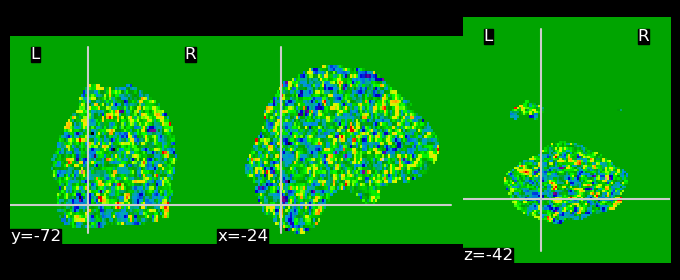

In [49]:
#Set some constants
high_pass= 0.009
low_pass = 0.08
t_r = 3

#Clean!
clean_img = nimg.clean_img(func_img,confounds=confounds_matrix,detrend=True,standardize=True,
                         low_pass=low_pass,high_pass=high_pass,t_r=t_r, mask_img=mask_file)

#Let's visualize our result! Doesn't really tell us much, but that's the data we're using for analysis!
nplot.plot_epi(clean_img.slicer[:,:,:,50])

### Applying Parcellations to Resting State Data

In [50]:
from nilearn import datasets

In [51]:
parcel_dir = '../resources/rois/'
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)

In [52]:
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

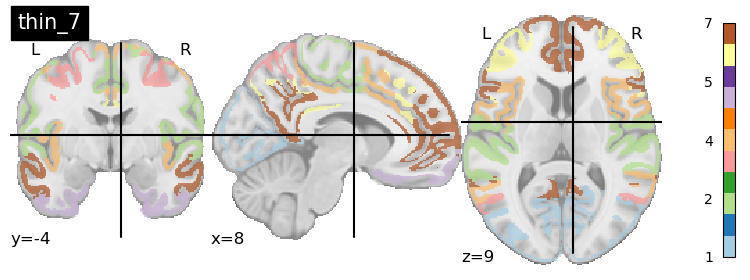

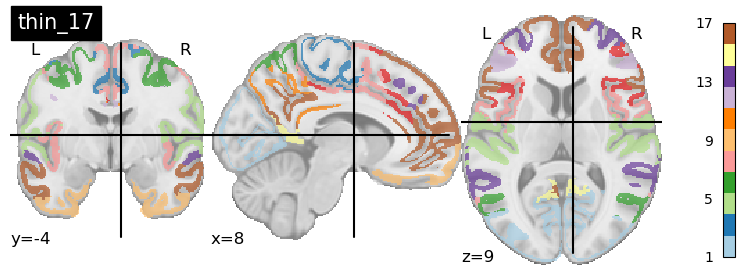

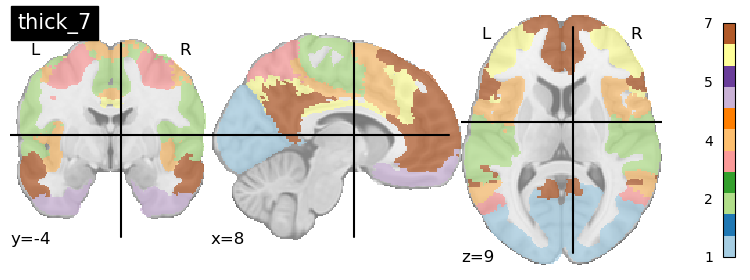

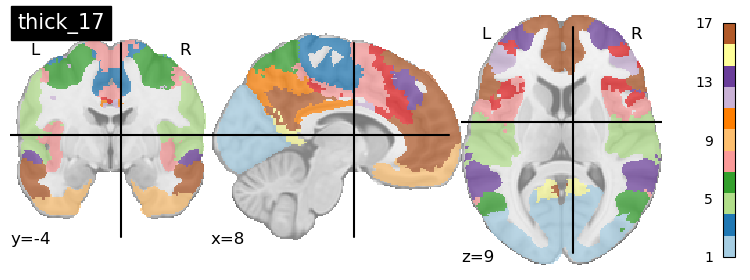

In [53]:
#Define where to slice the image
cut_coords = (8, -4, 9)
#Show a colorbar
colorbar = True
#Color scheme to show when viewing image
cmap = 'Paired'

#Plot all parcellation schemas referred to by atlas_yeo_2011
nplot.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')
nplot.plot_roi(atlas_yeo_2011['thin_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_17')
nplot.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
nplot.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')

#### Spatial Separation of Network

In [54]:
atlas_yeo = atlas_yeo_2011['thick_7']

In [55]:
from nilearn.regions import connected_label_regions

In [56]:
region_labels = connected_label_regions(atlas_yeo)

/home/lucja/anaconda3/lib/python3.9/site-packages/nilearn/regions/region_extractor.py:546: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  new_labels_img = new_img_like(labels_img, new_labels_data, affine=affine)


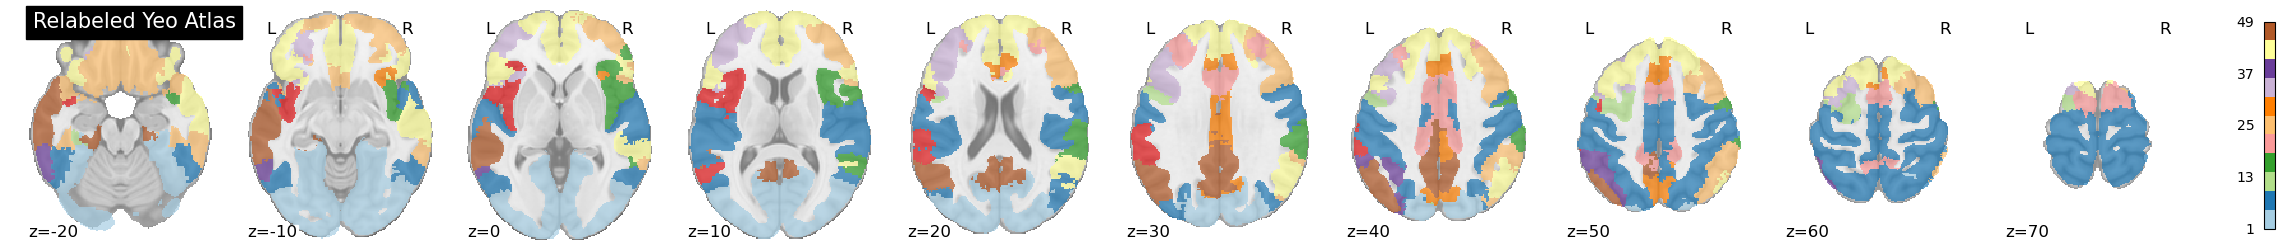

In [57]:
nplot.plot_roi(region_labels,
               cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
               display_mode='z',
               colorbar=True,
               cmap='Paired',
               title='Relabeled Yeo Atlas')

In [58]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

#### Resampling the Atlas
Storing the separated version of the atlas into a NIFTI file so that we can work with it later

In [59]:
import nibabel as nib
from nilearn import image as nimg

In [60]:
func_file = '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [61]:
func_img = nib.load(func_file)

In [62]:
print('Size of functional image:', func_img.shape)
print('Size of atlas image:', region_labels.shape)

Size of functional image: (97, 115, 65, 100)
Size of atlas image: (256, 256, 256)


In [63]:
resampled_yeo = nimg.resample_to_img(region_labels, func_img, interpolation = 'nearest')

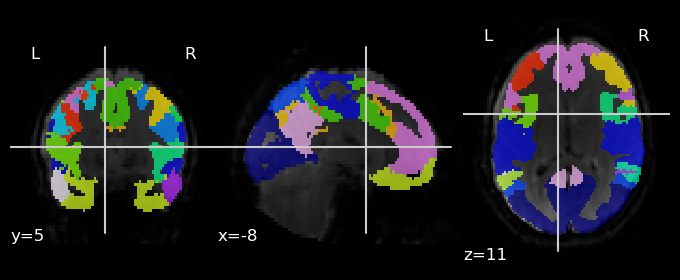

In [64]:
# Note that we're pulling a random timepoint from the fMRI data
nplot.plot_roi(resampled_yeo, func_img.slicer[:, :, :, 54])

#### Visualising the ROIs from Yeo Brain Atlas

In [65]:
# Make a mask for ROI 44
roi_mask44 = nimg.math_img('a == 44', a=resampled_yeo)

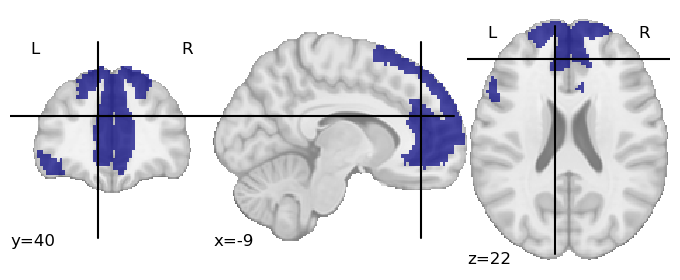

In [66]:
# Visualize ROI
nplot.plot_roi(roi_mask44)

In [67]:
# Make a mask for ROI 46
roi_mask46 = nimg.math_img('a == 46', a=resampled_yeo)

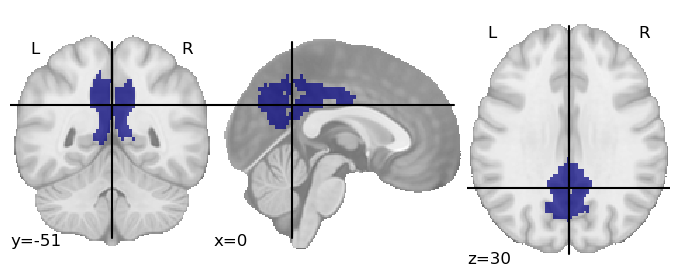

In [68]:
# Visualize ROI
nplot.plot_roi(roi_mask46)

### Functional Connectivity Analysis

In [69]:
#Use PyBIDS to parse BIDS data structure
layout = BIDSLayout('/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output',
                   config=['bids','derivatives'])

In [70]:
#Get resting state data (preprocessed, mask, and confounds file)
func_files = layout.get(subject=sub,
                        datatype='func', task='rest1',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                        return_type='file')

mask_files = layout.get(subject=sub,
                        datatype='func', task='rest1',
                        desc='brain',
                        suffix="mask",
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                        return_type='file')

confound_files = layout.get(subject=sub,
                            datatype='func',
                            task='rest1',
                            desc='confounds',
                            extension='tsv',
                            return_type='file')

In [71]:
func_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [72]:
mask_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz']

In [73]:
confound_files

['/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output/sub-01/func/sub-01_task-rest1_desc-confounds_timeseries.tsv']

In [74]:
#Load separated parcellation
parcel_file = '../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz'
yeo_7 = nimg.load_img(parcel_file)

In [75]:
from nilearn import input_data

/home/lucja/anaconda3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [76]:
# create an object using the parcellation file yeo_7 and our cleaning settings 
masker = input_data.NiftiLabelsMasker(labels_img=yeo_7,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                     low_pass = 0.08,
                                     high_pass = 0.009,
                                     t_r=2)

In [77]:
# Pull the first subject's data
func_file = func_files[0]
mask_file = mask_files[0]
confound_file = confound_files[0]

In [78]:
def extract_confounds(confound_tsv,confounds,dt=True):
    '''
    Arguments:
        confound_tsv                    Full path to confounds.tsv
        confounds                       A list of confounder variables to extract
        dt                              Compute temporal derivatives [default = True]
        
    Outputs:
        confound_mat                    
    '''
    
    if dt:    
        dt_names = ['{}_derivative1'.format(c) for c in confounds]
        confounds = confounds + dt_names
    
    #Load in data using Pandas then extract relevant columns
    confound_df = pd.read_csv(confound_tsv,delimiter='\t') 
    confound_df = confound_df[confounds]
    
 
    #Convert into a matrix of values (timepoints)x(variable)
    confound_mat = confound_df.values 
    
    #Return confound matrix
    return confound_mat


In [79]:
# Load functional image
tr_drop = 4
func_img = nimg.load_img(func_file)

#Remove the first 4 TRs
func_img = func_img.slicer[:,:,:,tr_drop:]

#Use the above function to pull out a confound matrix
confounds = extract_confounds(confound_file,
                              ['trans_x','trans_y','trans_z',
                               'rot_x','rot_y','rot_z',
                               'global_signal',
                               'white_matter','csf'])
#Drop the first 4 rows of the confounds matrix
confounds = confounds[tr_drop:,:]

In [80]:
#A pply cleaning, parcellation and extraction to functional data
cleaned_and_averaged_time_series = masker.fit_transform(func_img,confounds)
cleaned_and_averaged_time_series.shape

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')
Resampling labels


/home/lucja/anaconda3/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:578: UserWarning: After resampling the label image to the data image, the following labels were removed: {11, 9, 48, 3}. Label image only contains 46 labels (including background).
  warnings.warn("After resampling the label image to the "


(96, 45)

In [81]:
print(masker.labels_)
print("Number of labels", len(masker.labels_))

[1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49]
Number of labels 45


In [82]:
import numpy as np

# Get the label numbers from the atlas
atlas_labels = np.unique(yeo_7.get_fdata().astype(int))

# Get number of labels that we have
NUM_LABELS = len(atlas_labels)
print(NUM_LABELS)

50


In [83]:
# Remember fMRI images are of size (x,y,z,t)
# where t is the number of timepoints
num_timepoints = func_img.shape[3]

# Create an array of zeros that has the correct size
final_signal = np.zeros((num_timepoints, NUM_LABELS))

# Get regions that are kept
regions_kept = np.array(masker.labels_)

# Fill columns matching labels with signal values
final_signal[:, regions_kept] = cleaned_and_averaged_time_series

print(final_signal.shape)

(96, 50)


In [84]:
valid_regions_signal = final_signal[:, regions_kept]
print(valid_regions_signal.shape)

(96, 45)


In [85]:
np.array_equal(
    valid_regions_signal,
    cleaned_and_averaged_time_series
)

True

#### Calculating Connectivity

In [86]:
from nilearn.connectome import ConnectivityMeasure

In [87]:
correlation_measure = ConnectivityMeasure(kind='correlation')

In [88]:
full_correlation_matrix = correlation_measure.fit_transform([cleaned_and_averaged_time_series])
full_correlation_matrix.shape

(1, 45, 45)

In [89]:
full_correlation_matrix[0, 35, 40]

0.5998939063428715

In [90]:
full_correlation_matrix[0, 40, 35]

0.5998939063428715

In [91]:
task4_condition = []

#Get the functional file for the subject task 4(MNI space)
func_file4 = layout.get(subject=sub,
                       datatype='func', task='rest4',
                       desc='preproc',
                       extension="nii.gz",
                       return_type='file')[0]

#Get the confounds file for the subject task 4 (MNI space)
confound_file4=layout.get(subject=sub, datatype='func',
                         task='rest4',
                         desc='confounds',
                         extension='tsv',
                         return_type='file')[0]



In [92]:
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import pandas as pd
from bids import BIDSLayout

In [96]:
fmriprep_dir = '/home/lucja/UniWork/kogniMA/SemIII/NetNeuro/final_project/data/output'
layout = BIDSLayout(fmriprep_dir, config=['bids','derivatives'])

# First we're going to create some empty lists to store all our data in!
pooled_task2 = []

#Which confound variables should we use?
confound_variables = ['trans_x','trans_y','trans_z',
                           'rot_x','rot_y','rot_z',
                           'global_signal',
                           'white_matter','csf']

#Get the functional file for the subject (MNI space)
func_file = layout.get(subject=sub,
                       datatype='func', task='rest2',
                       desc='preproc',
                       extension="nii.gz",
                       return_type='file')[0]

#Get the confounds file for the subject (MNI space)
confound_file= layout.get(subject=sub, datatype='func',
                         task='rest2',
                         desc='confounds',
                         extension='tsv',
                         return_type='file')[0]

#Load the functional file in
func_img = nimg.load_img(func_file)

#Drop the first 4 TRs
func_img = func_img.slicer[:,:,:,tr_drop:]


#Extract the confound variables using the function
confounds = extract_confounds(confound_file,
                              confound_variables)

#Drop the first 4 rows from the confound matrix
#Which rows and columns should we keep?
confounds = confounds[tr_drop:,:]

#Apply the parcellation + cleaning to our data
#What function of masker is used to clean and average data?
time_series = masker.fit_transform(func_img,confounds)

#This collects a list of all subjects
pooled_task2.append(time_series)

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')


In [97]:
# First we're going to create some empty lists to store all our data in!
pooled_task4 = []

#Which confound variables should we use?
confound_variables4 = ['trans_x','trans_y','trans_z',
                      'rot_x','rot_y','rot_z',
                      'global_signal',
                      'white_matter','csf']

#Get the functional file for the subject (MNI space)
func_file4 = layout.get(subject=sub,
                       datatype='func', task='rest4',
                       desc='preproc',
                       extension="nii.gz",
                       return_type='file')[0]

#Get the confounds file for the subject (MNI space)
confound_file4= layout.get(subject=sub, datatype='func',
                          task='rest4',
                          desc='confounds',
                          extension='tsv',
                          return_type='file')[0]

#Load the functional file in
func_img4 = nimg.load_img(func_file4)

#Drop the first 4 TRs
func_img4 = func_img4.slicer[:,:,:,tr_drop:]


#Extract the confound variables using the function
confounds4 = extract_confounds(confound_file4,
                              confound_variables4)

#Drop the first 4 rows from the confound matrix
#Which rows and columns should we keep?
confounds4 = confounds4[tr_drop:,:]

#Apply the parcellation + cleaning to our data
#What function of masker is used to clean and average data?
time_series4 = masker.fit_transform(func_img,confounds4)

#This collects a list of all subjects
pooled_task4.append(time_series4)

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7fb908373970>, <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x7fb90803d730>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fb8fe95aee0>,
  'low_pass': 0.08,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=[ array([[ -0.058456, ..., -10.083283],
       ...,
       [  0.170261, ...,   7.771002]])], sample_m

/home/lucja/anaconda3/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:617: UserWarning: Persisting input arguments took 1.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [98]:
task2_correlation_matrices = correlation_measure.fit_transform(pooled_task2)
task4_correlation_matrices = correlation_measure.fit_transform(pooled_task4)

#### Visualizing Correlation Matrices and Group Differences

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

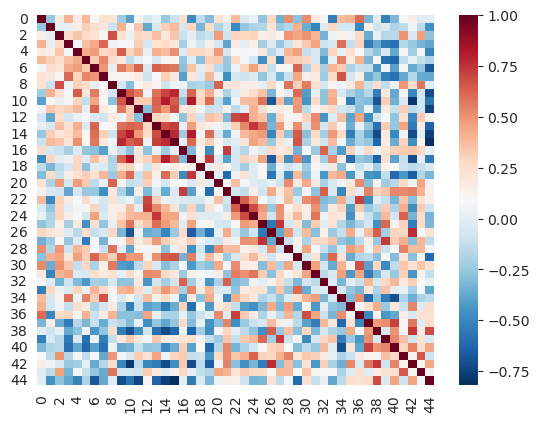

In [100]:
sns.heatmap(task2_correlation_matrices[0], cmap='RdBu_r')

<AxesSubplot:>

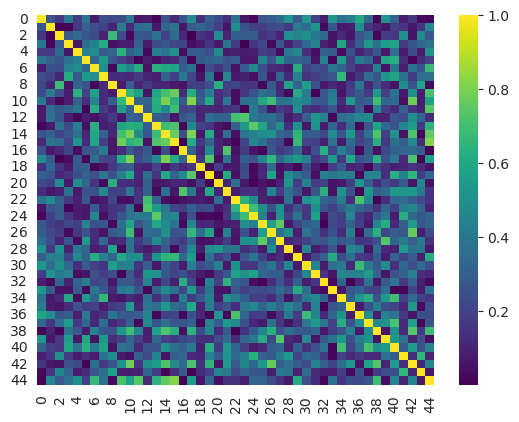

In [102]:
sns.heatmap(np.abs(task2_correlation_matrices[0]), cmap='viridis')

<AxesSubplot:>

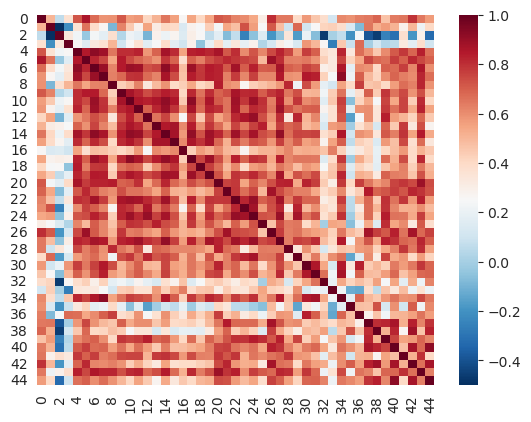

In [101]:
sns.heatmap(task4_correlation_matrices[0], cmap='RdBu_r')2

<AxesSubplot:>

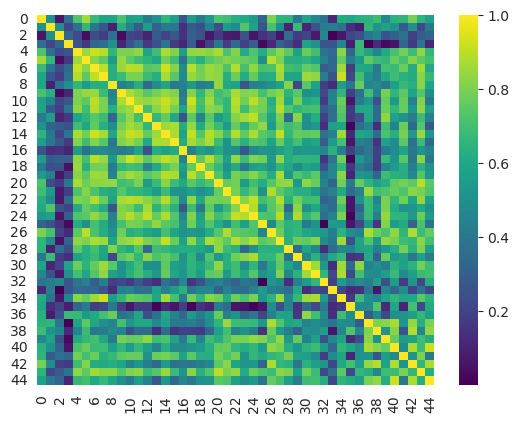

In [104]:
sns.heatmap(np.abs(task4_correlation_matrices[0]), cmap='viridis')